### Kagome lattice construction

In [127]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
pb.pltutils.use_style()
%matplotlib inline
from pybinding.repository import graphene
from math import pi, sqrt

def model(a, V_A, V_B):    # V_A: left potential. V_B: right potential. width: width of the superlattice.
    # 1. a should be odd numbers because if a is even, the model becomes a little unsymmetric.
    # 2. a should? not be three's multiple numbers because the brilluiin points(K and Gamma) switch.
    def mass_term(c, V_A, V_B):   # c determines the area potential is applied. b determines the potential amplitude.
        @pb.onsite_energy_modifier
        def potential(energy, x, y):
            energy[np.tan(np.pi/3)*x+y<-c] = V_A
            energy[np.tan(np.pi/3)*x+y>c] = V_B
            energy[(np.tan(np.pi/3)*x+y>-c)&(np.tan(np.pi/3)*x+y<c)] = 0
            return energy
        return potential
    width = a*graphene.a  # nm
    b = a
    print ("the superlattice width is ", width, "nm")
    ###################################### model without potential ######################################
    without_potential = pb.Model(graphene.monolayer(),
                                 pb.primitive(a1=a, a2=b),
                                 pb.translational_symmetry(a1=a*graphene.a, a2=b*graphene.a)
    )
    ######################################## model with potential ########################################
    with_potential = pb.Model(graphene.monolayer(),
                              pb.primitive(a1=a, a2=b),
                              pb.translational_symmetry(a1=a*graphene.a, a2=b*graphene.a),
                              mass_term(np.tan(np.pi/3)*0.5*width,V_A,V_B)   # for this condition, the potential area is suited for kagome lattice.
    )
    ############################## Superlattice and potential configuration ##############################
    f, axs = plt.subplots(1,2,figsize=(11,6))
    f.suptitle("Spatial LDOS for different potentials(0eV and given potential)", fontsize=16)
    f.subplots_adjust(top=0.88)
    ax1 = plt.subplot(121)
    ax1.set_title('Superlattice with potential (same with no potential model)')
    with_potential.plot(num_periods=0) # superlattice of with_potential model
    ax2 = plt.subplot(122)
    ax2.set_title('potential configuration of with_potential model')
    with_potential.onsite_map.plot_contourf() # potential configuration
    pb.pltutils.colorbar(label="U (eV)")
    
    ############################################ Spatial LDOS ############################################
    f, axs = plt.subplots(1,2,figsize=(13,7))
    f.suptitle("Spatial LDOS for different potentials(0eV and given potential)", fontsize=16)
    f.subplots_adjust(top=0.88)

    ax1 = plt.subplot(121)
    ax1.set_title('Potential: 0')
    solver = pb.solver.lapack(without_potential)
    w = solver.eigenvalues
    ldos = solver.calc_spatial_ldos(energy= 0, broadening=0.03)  # near to ground state energy(close to 0)
    ldos.plot(num_periods=0,site_radius=(0.03, 0.06))
    pb.pltutils.colorbar(label="LDOS")

    ax2=plt.subplot(122)
    ax2.set_title('Potential: given potential by model function')
    solver = pb.solver.lapack(with_potential)
    w = solver.eigenvalues
    ldos = solver.calc_spatial_ldos(energy= 0, broadening=0.03)  # near to ground state energy(close to 0)
    ldos.plot(num_periods=0,site_radius=(0.03, 0.06))
    pb.pltutils.colorbar(label="LDOS")
    
    ############################################### Band structure ###############################################
    a_cc = graphene.a_cc
    a2 = a*graphene.a_cc*sqrt(3)
    b2= b*graphene.a_cc*sqrt(3)
    Gamma = [0, 0]
    K1 = [-4*pi / (3*a2), 0]
    M = [0, 2*pi / (sqrt(3)*b2)]
    K2 = [2*pi / (3*a2), 2*pi / (sqrt(3)*b2)]

    f, axs = plt.subplots(1,2,figsize=(13,7))
    f.suptitle("Band structure of 0eV and given potential", fontsize=16)
    f.tight_layout()
    f.subplots_adjust(top=0.88)
    ax1 = plt.subplot(121)
    ax1.set_title('Potential: 0 eV')
    solver = pb.solver.lapack(without_potential)
    bands = solver.calc_bands(K1,Gamma,M,K2)
    bands.plot(color='r')
    plt.ylim(-0.5, 0.5)
    
    ax2 = plt.subplot(122)
    ax2.set_title('Potential: given potential by model function')
    solver = pb.solver.lapack(with_potential)
    bands = solver.calc_bands(K1,Gamma,M,K2)
    bands.plot(color='b')
    plt.ylim(-0.5, 0.5)
    ############################################### DOS ###############################################
    f, axs = plt.subplots(1,2,figsize=(13,7))
    f.suptitle("DOS for 0 eV and given potential", fontsize=16)
    f.tight_layout()
    f.subplots_adjust(top=0.88)
    ax1 = plt.subplot(121)
    ax1.set_title('Potential: 0 eV')
    solver = pb.solver.lapack(without_potential)
    lapack_dos = solver.calc_dos(np.linspace(-9, 9, 500), broadening=0.1)
    #lapack_dos.plot(color='b',label="diag")
    lapack_dos.data
    plt.plot(lapack_dos.data, np.linspace(-9, 9, 500),label='position: [4.5,3]',color='r')   # To switch the x and y axis
    plt.ylim(-0.5, 0.5)

    ax2 = plt.subplot(122)
    ax2.set_title('Potential: given potential by model function')
    solver = pb.solver.lapack(with_potential)
    lapack_dos = solver.calc_dos(np.linspace(-9, 9, 500), broadening=0.1)
    #lapack_dos.plot(color='b',label="diag")
    lapack_dos.data
    plt.plot(lapack_dos.data, np.linspace(-9, 9, 500),label='position: [4.5,3]',color='r')   # To switch the x and y axis
    plt.ylim(-0.5, 0.5)

    
    ############################################### LDOS ###############################################
    f, axs = plt.subplots(1,2,figsize=(13,7))
    f.suptitle("LDOS for 0 eV and given potential", fontsize=16)
    f.tight_layout()
    f.subplots_adjust(top=0.88)
    ax1 = plt.subplot(121)
    ax1.set_title('Potential: 0 eV')
    solver = pb.solver.lapack(without_potential)
    
    lapack_ldos = solver.calc_ldos(np.linspace(-9, 9, 500), broadening=0.1, position=[0, 0])
    lapack_ldos.plot(color='r',label="position: [0,0]")

    lapack_ldos = solver.calc_ldos(np.linspace(-9, 9, 500), broadening=0.1, position=[-4.5, -3])
    lapack_ldos.plot(color='g',label="position: [-4.5,-3]")

    lapack_ldos = solver.calc_ldos(np.linspace(-9, 9, 500), broadening=0.1, position=[4.5, 3])
    lapack_ldos.plot(color='b',label="position: [4.5,3]")
 
    plt.legend(loc='upper right')

    
    ax2 = plt.subplot(122)
    ax2.set_title('Potential: given potential by model function')
    solver = pb.solver.lapack(with_potential)
    lapack_ldos = solver.calc_ldos(np.linspace(-9, 9, 500), broadening=0.1, position=[0, 0])
    lapack_ldos.data
    plt.plot(lapack_ldos.data, np.linspace(-9, 9, 500),label='position: [0,0]')   # In order to switch the x and y axis

    lapack_ldos = solver.calc_ldos(np.linspace(-9, 9, 500), broadening=0.1, position=[-4.5, -3])
    lapack_ldos.data
    plt.plot(lapack_ldos.data, np.linspace(-9, 9, 500),label='position: [-4.5,-3]')   # In order to switch the x and y axis
    
    lapack_ldos = solver.calc_ldos(np.linspace(-9, 9, 500), broadening=0.1, position=[4.5, 3])
    lapack_ldos.data
    plt.plot(lapack_ldos.data, np.linspace(-9, 9, 500),label='position: [4.5,3]')   # In order to switch the x and y axis
    plt.legend(loc='upper right')

## 1.1 zero potential and  $\pm0.1eV$ potential case

the superlattice width is  10.08395 nm


/home/Beomjin/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


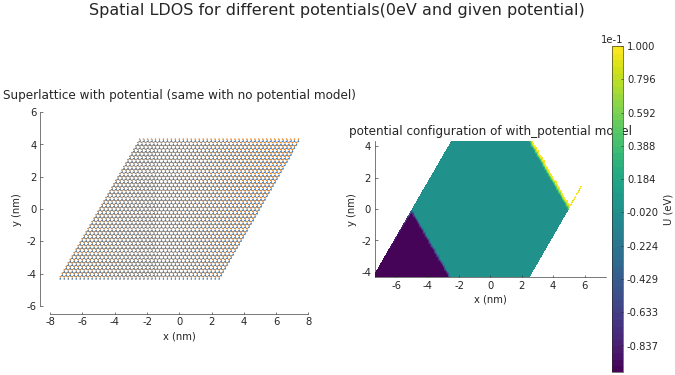

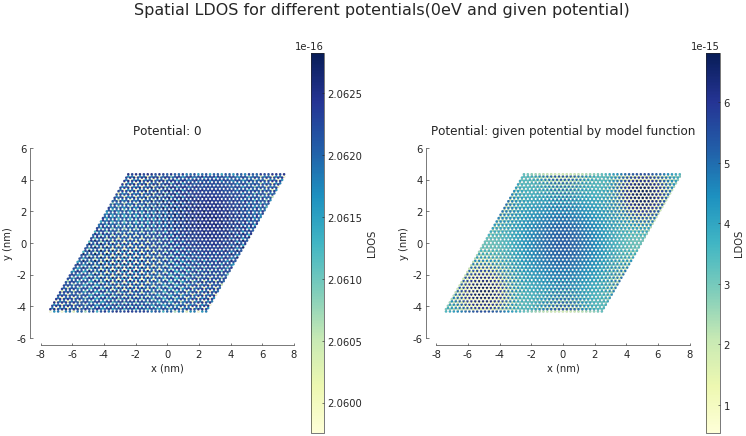

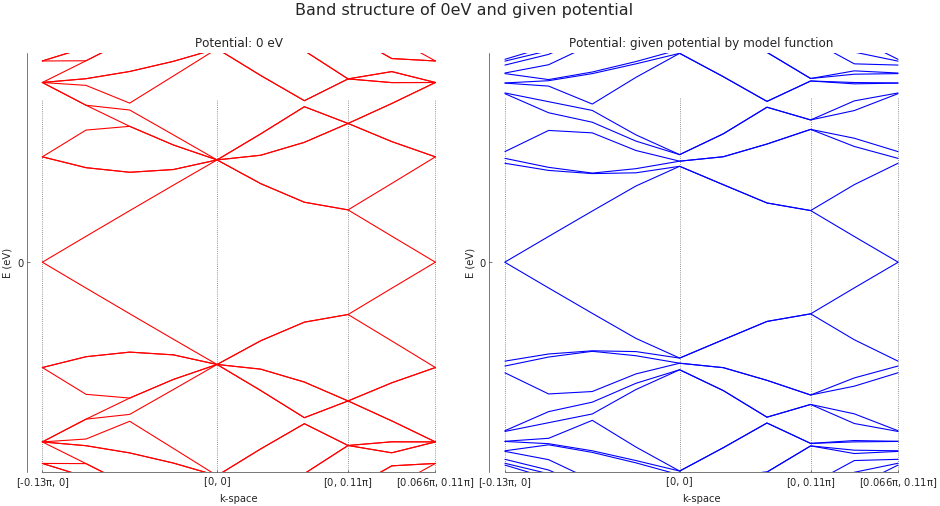

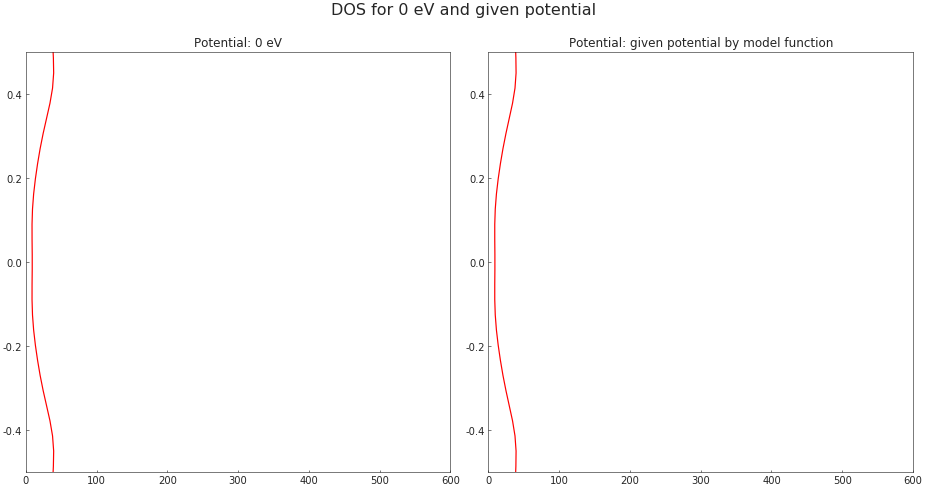

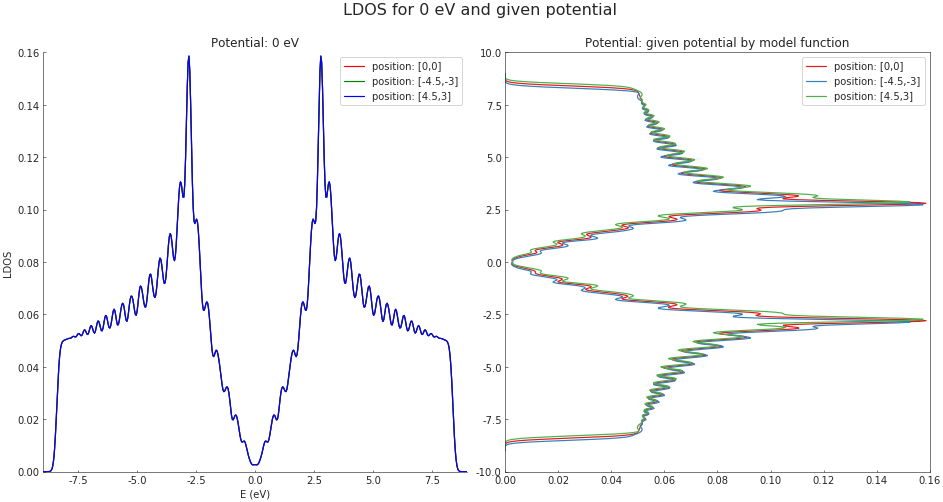

In [128]:
model(41,-0.1,0.1)  # a: need to put odd number, V_A, V_B

## 1.2 zero potential and  $\pm0.2eV$ potential case

the superlattice width is  10.08395 nm


/home/Beomjin/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


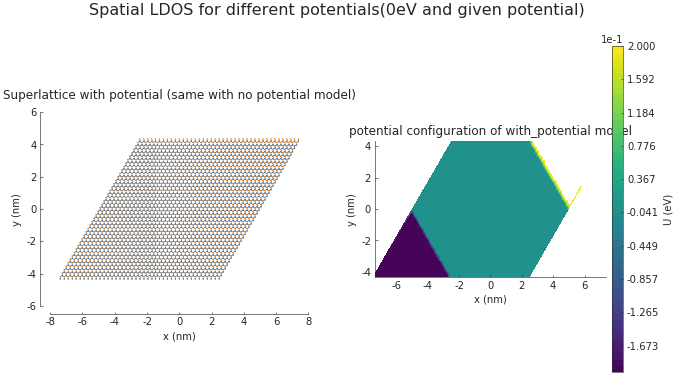

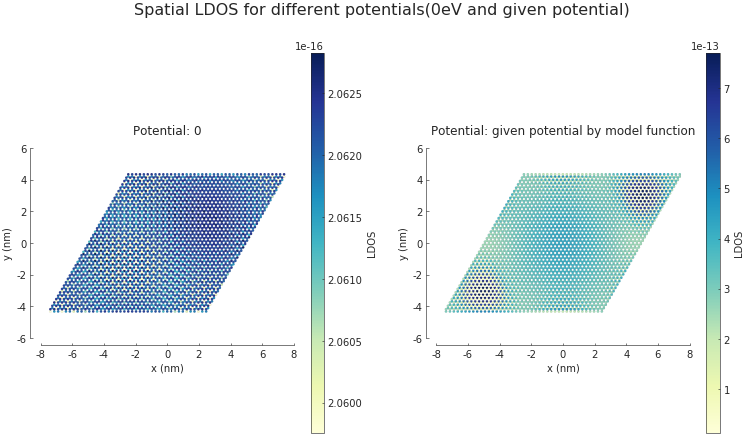

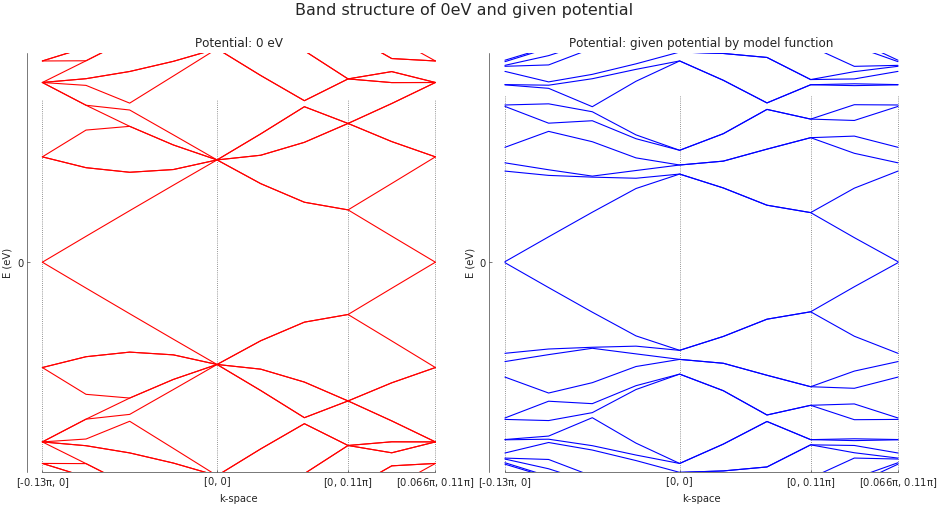

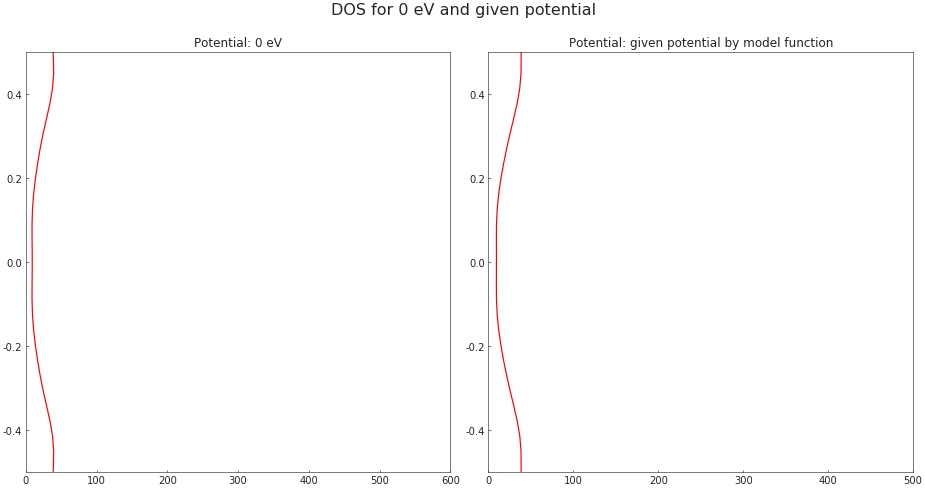

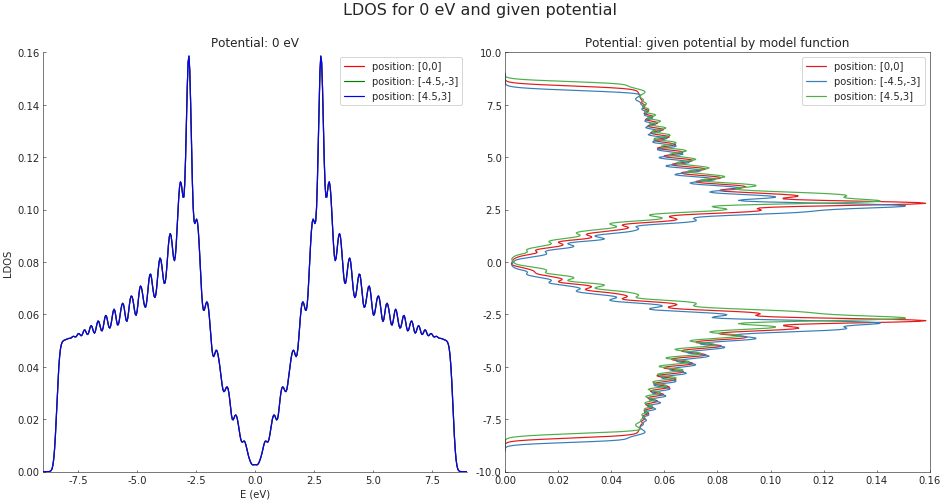

In [129]:
model(41,-0.2,0.2)  # width, V_A, V_B

## 1.3 zero potential and  $\pm0.3eV$ potential case

the superlattice width is  10.08395 nm


/home/Beomjin/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


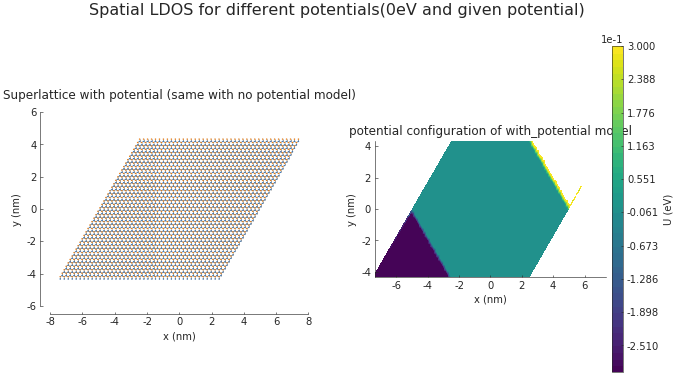

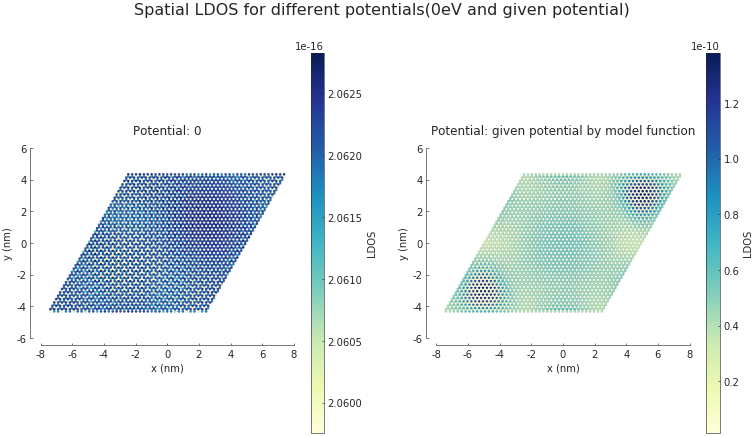

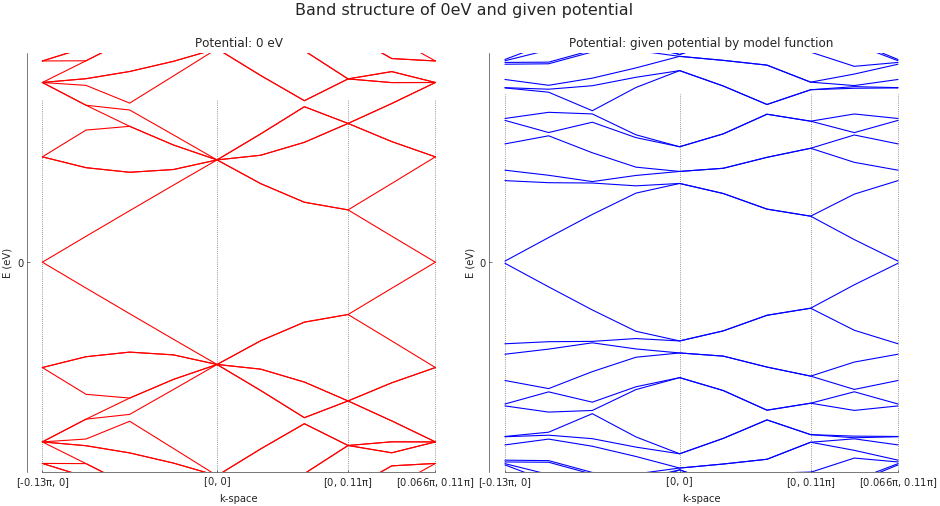

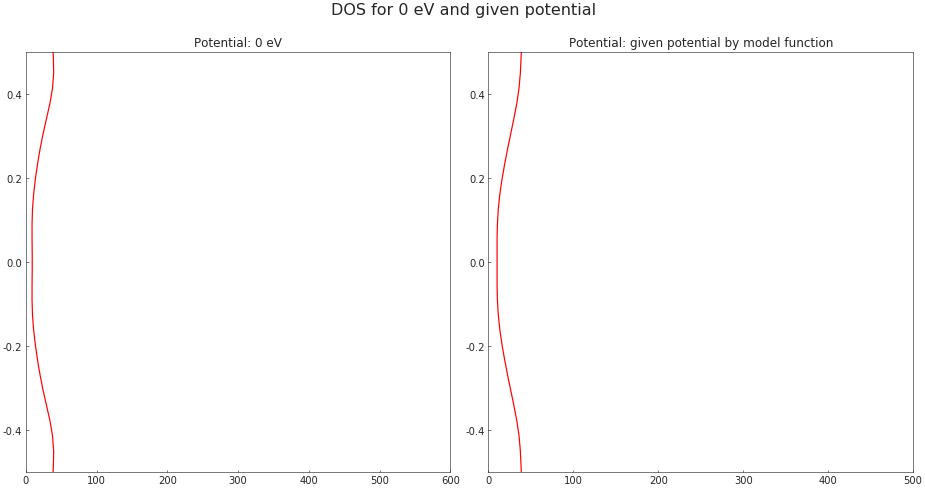

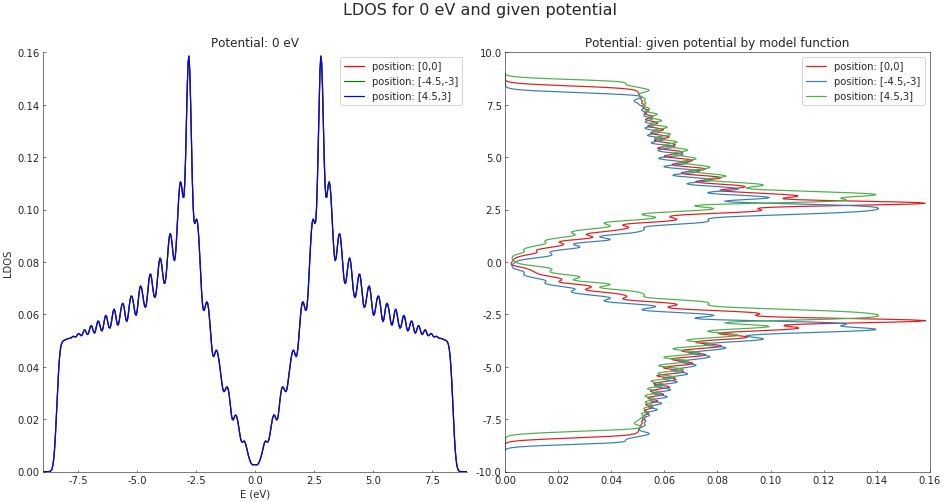

In [130]:
model(41,-0.3,0.3)  # width, V_A, V_B

## 1.4 zero potential and  $\pm0.4eV$ potential case

the superlattice width is  10.08395 nm


/home/Beomjin/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


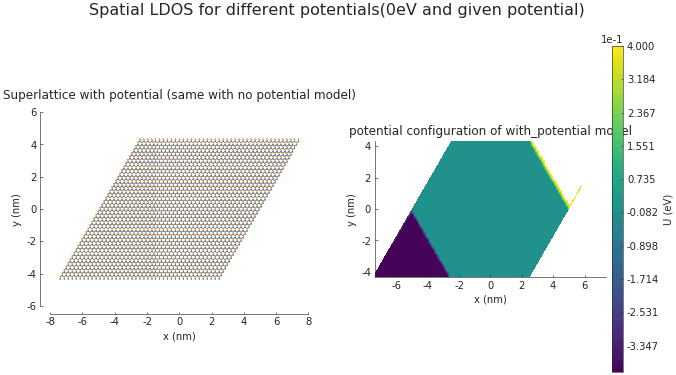

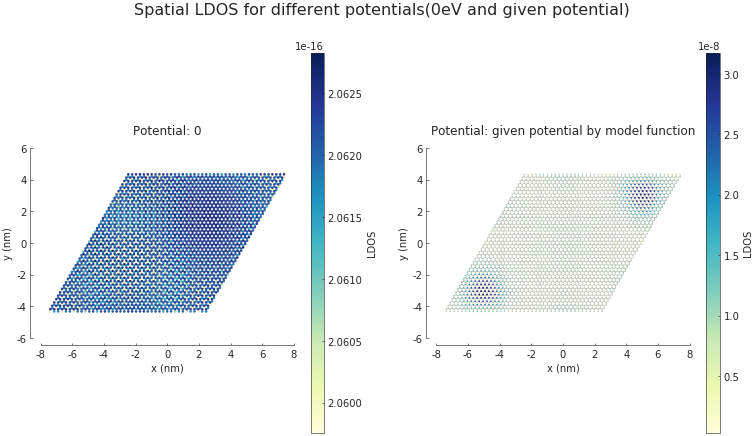

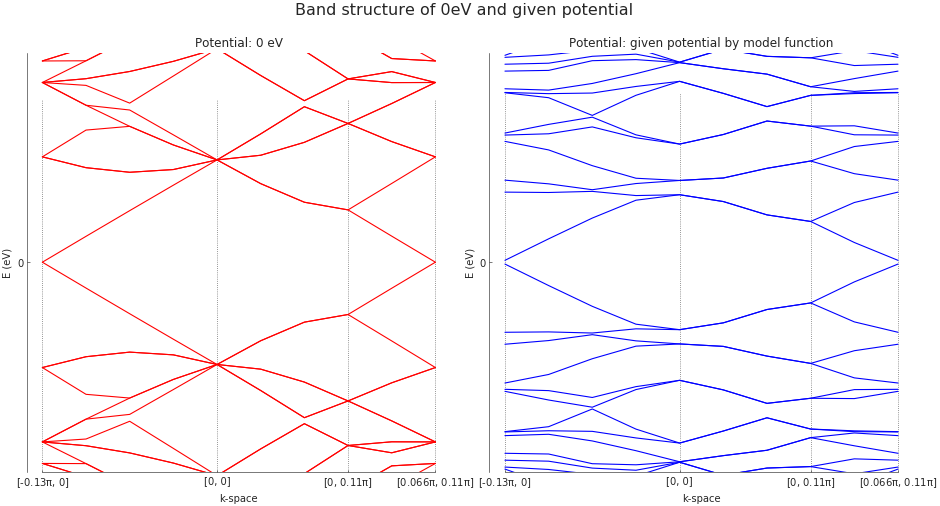

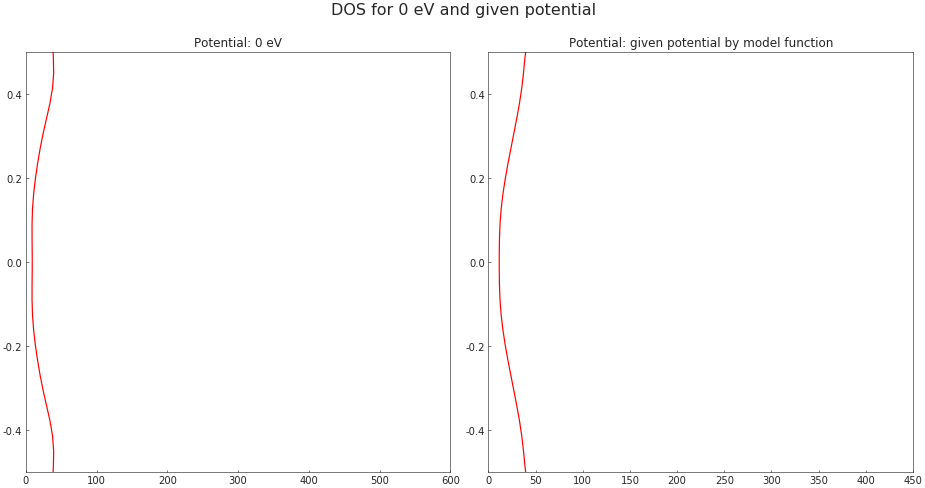

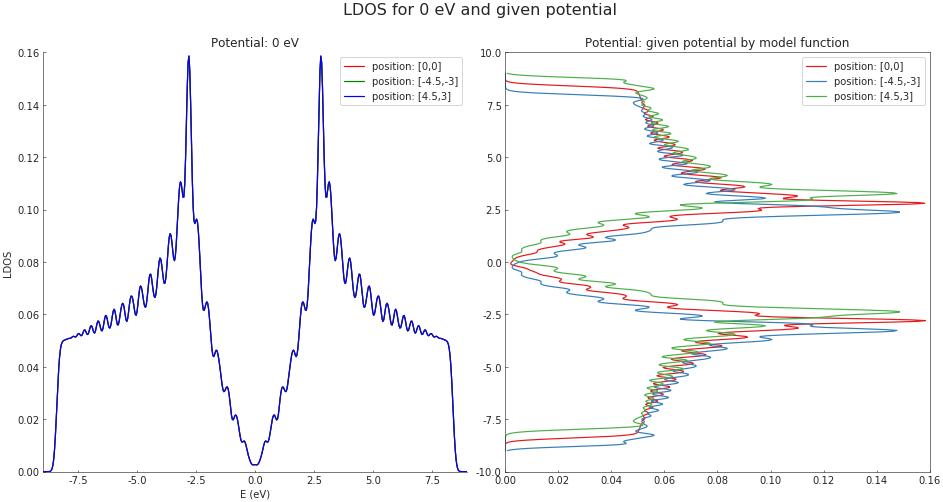

In [131]:
model(41,-0.4,0.4)  # width, V_A, V_B

## 1.5 zero potential and  $\pm0.5eV$ potential case

the superlattice width is  10.08395 nm


/home/Beomjin/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


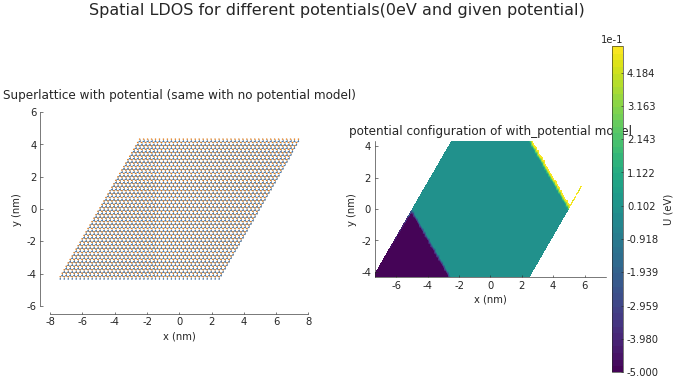

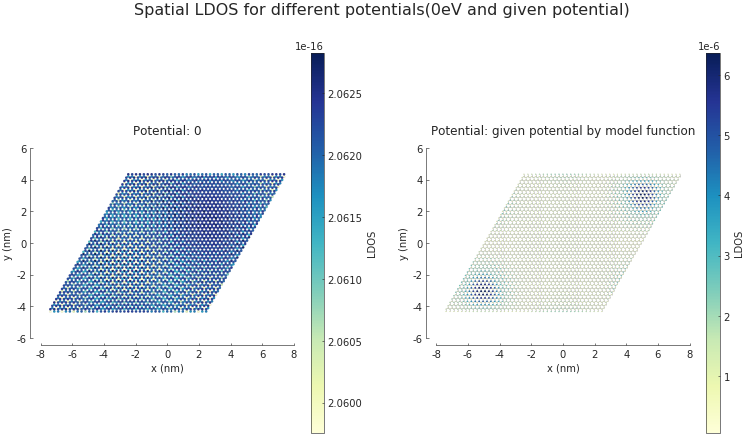

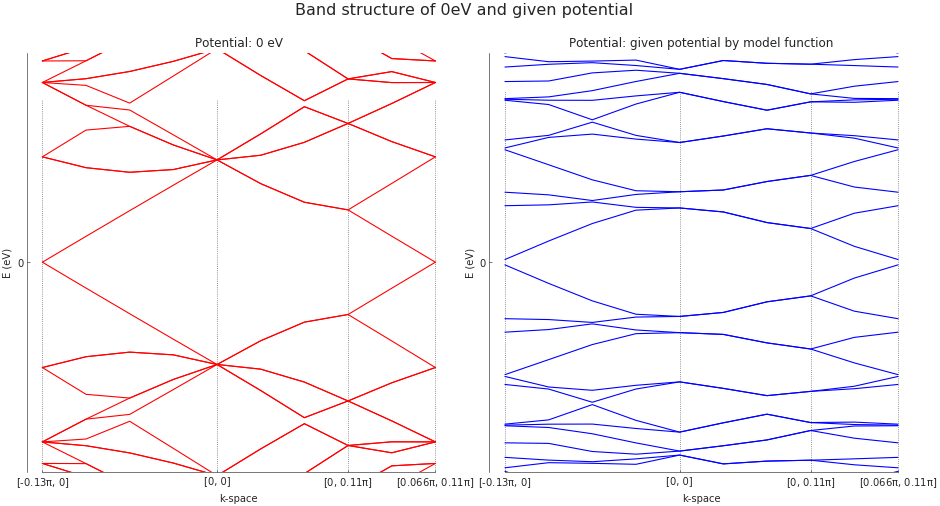

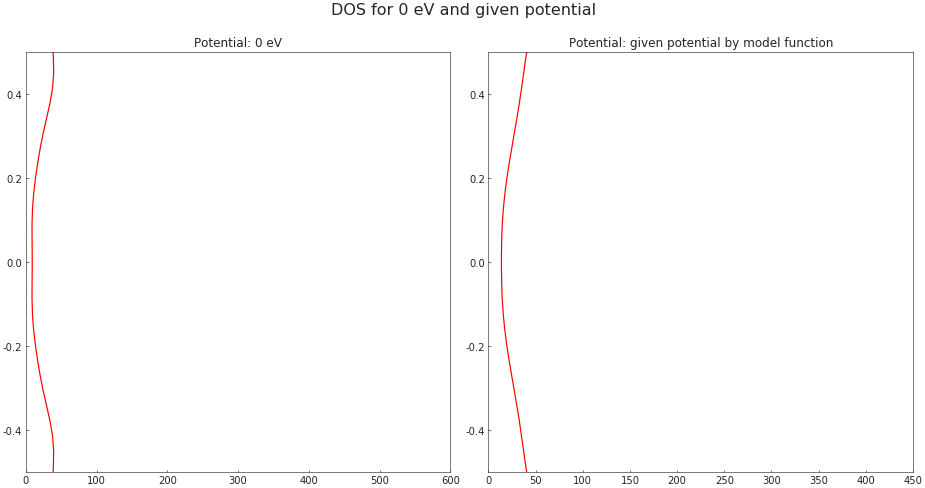

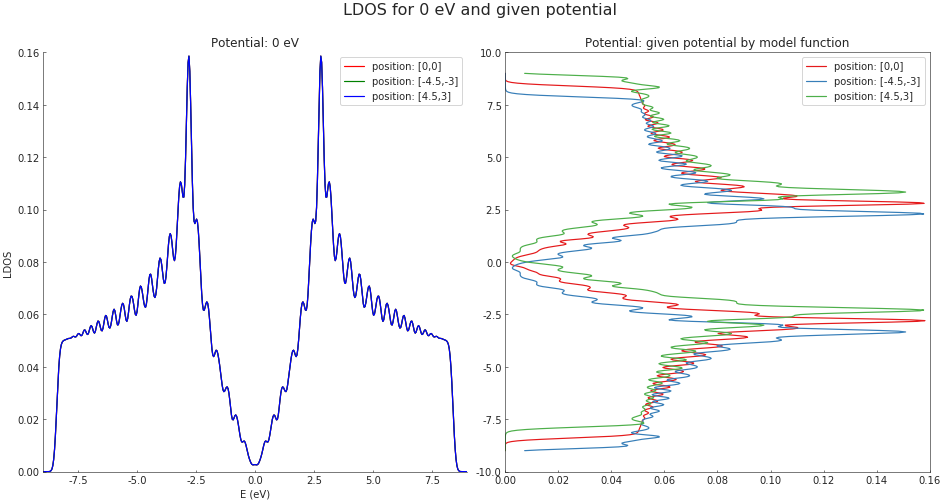

In [132]:
model(41,-0.5,0.5)  # width, V_A, V_B

## 1.6 zero potential and  $\pm1eV$ potential case

the superlattice width is  10.08395 nm


/home/Beomjin/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


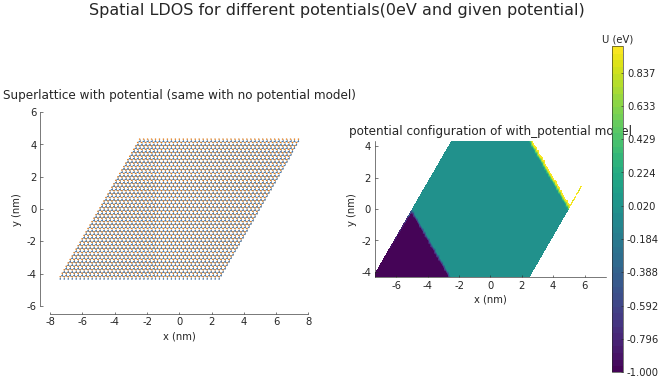

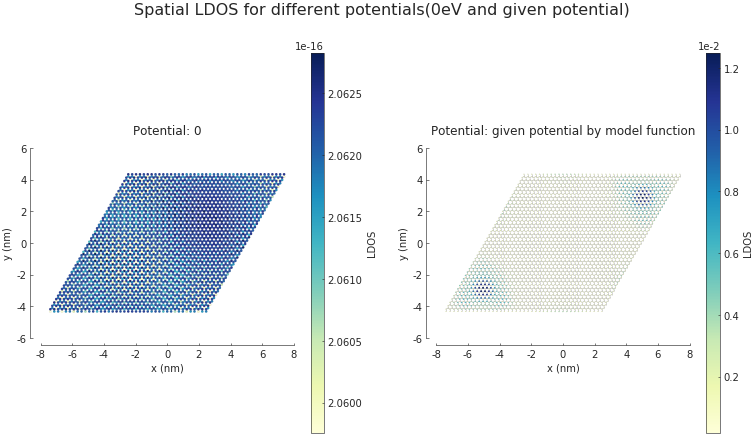

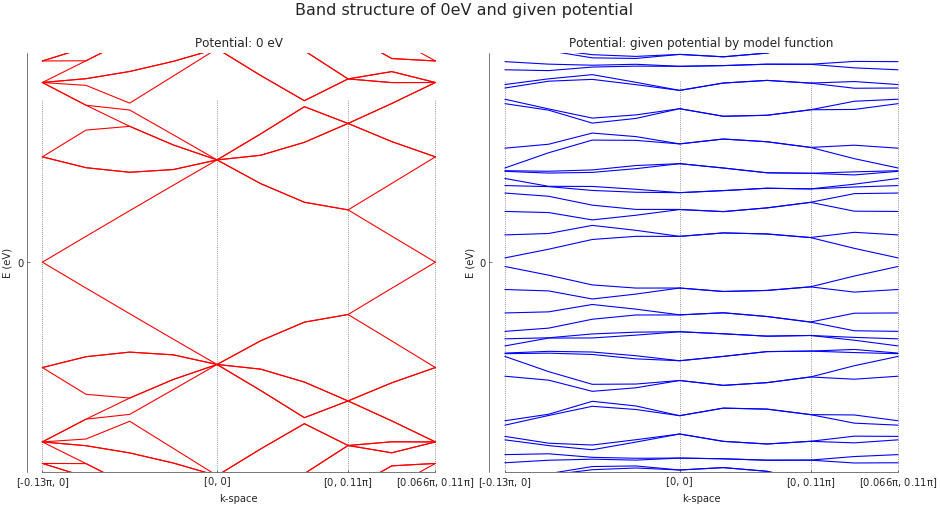

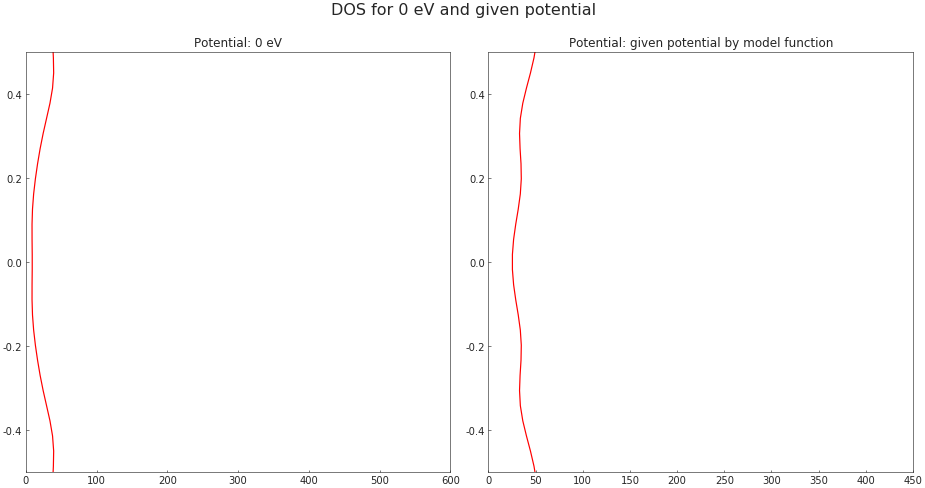

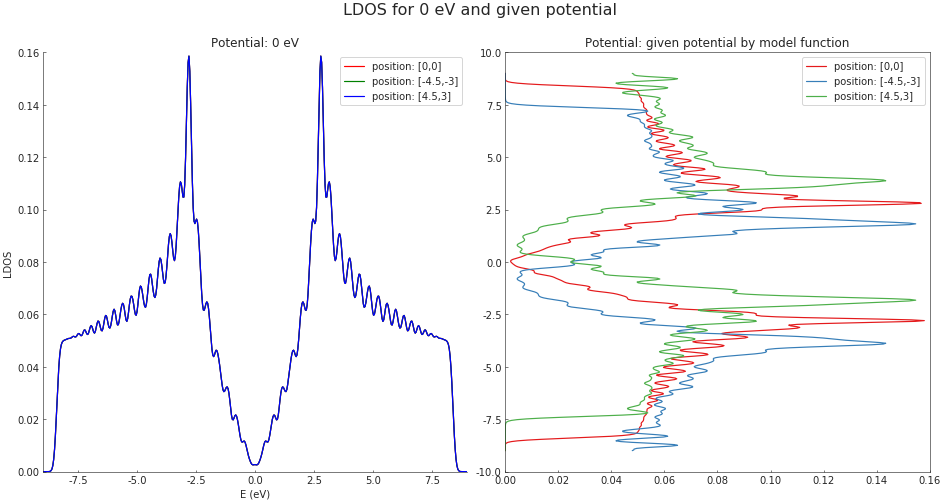

In [133]:
model(41,-1,1)  # width, V_A, V_B